In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import datetime as dt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier

# Read Data

In [4]:
file = 'use_of_force_model_data.csv'
data = pd.read_csv(file, index_col = 0)
data

,datetime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,Incident Location: Police vehicle with prisoner handling cage,...,Newham,Out of force,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,is force required?
0,2020-04-01 00:12:00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-04-01 01:30:00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020-04-01 03:30:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2020-04-01 04:25:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2020-04-01 04:12:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147890,2021-01-31 18:00:00,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
147891,2021-01-31 15:20:00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147892,2021-01-31 22:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
147893,2021-01-31 19:48:00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Convert datetime to datetime ordinal
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime'] = data['datetime'].map(dt.datetime.toordinal)
data


,datetime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,Incident Location: Police vehicle with prisoner handling cage,...,Newham,Out of force,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,is force required?
0,737516,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,737516,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,737516,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,737516,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,737516,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147890,737821,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
147891,737821,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147892,737821,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
147893,737821,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
for i in data.columns:
    print(i, data[i].isnull().sum())

datetime 0
Incident Location: Street/Highway 0
Incident Location: Public Transport 0
Incident Location: Retail Premises 0
Incident Location: Open ground (e.g. park, car park, field) 0
Incident Location: Licensed Premises 0
Incident Location: Sports or Event Stadia 0
Incident Location: Hospital/A&E (non-mental-health setting) 0
Incident Location: Mental Health Setting 0
Incident Location: Police vehicle with prisoner handling cage 0
Incident Location: Police vehicle without prisoner handling cage 0
Incident Location: Dwelling 0
Incident Location: Police station (excluding custody block) 0
Incident Location: Custody Block 0
Incident Location: Ambulance 0
Incident Location: Other 0
MainDuty: AFO 0
MainDuty: ARV 0
MainDuty: CID 0
MainDuty: CTSFO 0
MainDuty: Custody 0
MainDuty: Dog handler duty 0
MainDuty: Foot patrol 0
MainDuty: Mobile patrol 0
MainDuty: Mounted section duties 0
MainDuty: Off duty 0
MainDuty: Other 0
MainDuty: PSU/Public order 0
MainDuty: Roads policing 0
MainDuty: Surveil

# Create Smaller subset of data to decrease computing time

In [7]:
data_small = data.sample(20000, random_state=7)
data_small

,datetime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,Incident Location: Police vehicle with prisoner handling cage,...,Newham,Out of force,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,is force required?
90849,737698,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46158,737604,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
50640,737613,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135979,737793,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
63477,737638,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72210,737657,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58270,737628,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83277,737682,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
16711,737550,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Assign Input Output variables

In [8]:
y = data_small['is force required?']
y.shape

(20000,)

In [9]:
X = data_small.iloc[:, :-1]
X.shape

(20000, 78)

# Split Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, test_size = 0.2)

# Create Baseline Models

In [11]:
baseline_score = {}

In [12]:
# Evaluation Model
def evaluate_model(model, X_test, y_test, model_name):
    preds = model.predict(X_test)
    print(f'Model: {model_name}' )
    print('Model score:', round(model.score(X_test, y_test),2))
    print('----------------------------------------------------------')
    print('Classification Report:\n')
    print(metrics.classification_report(y_test, preds))
    baseline_score[model_name] = round(model.score(X_test, y_test),3)
    print('----------------------------------------------------------')
    print('Baseline Scores List')
    print(baseline_score)

In [13]:
# Evaluation bagging
bagging_score = {}
def evaluate_bagger(model, X_test, y_test, model_name):
    preds = model.predict(X_test)
    print(f'Model: {model_name}' )
    print('Model score:', round(model.score(X_test, y_test),2))
    print('----------------------------------------------------------')
    print('Classification Report:\n')
    print(metrics.classification_report(y_test, preds))
    bagging_score[model_name] = round(model.score(X_test, y_test),3)
    print('----------------------------------------------------------')
    print('Bagging Scores List')
    print(bagging_score)

In [14]:
#Baseline result
y.value_counts()

0    10777
1     9223
Name: is force required?, dtype: int64

Our target to beat is 45.9% Accuracy

# logistic regression

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [16]:
evaluate_model(lr, X_test, y_test, 'LogisticRegression')

Model: LogisticRegression
Model score: 0.55
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2199
           1       0.00      0.00      0.00      1801

    accuracy                           0.55      4000
   macro avg       0.27      0.50      0.35      4000
weighted avg       0.30      0.55      0.39      4000

----------------------------------------------------------
Baseline Scores List
{'LogisticRegression': 0.55}


# Knn

In [17]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv = 5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
print(knn_best)

KNeighborsClassifier(n_neighbors=2)


In [18]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
evaluate_model(knn, X_test, y_test, 'KNN')


Model: KNN
Model score: 0.6
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.84      0.70      2199
           1       0.61      0.30      0.40      1801

    accuracy                           0.60      4000
   macro avg       0.60      0.57      0.55      4000
weighted avg       0.60      0.60      0.56      4000

----------------------------------------------------------
Baseline Scores List
{'LogisticRegression': 0.55, 'KNN': 0.597}


# SVC

In [19]:
svc = SVC(probability= True)
svc.fit(X_train, y_train)
evaluate_model(svc, X_test, y_test, 'SVC')

Model: SVC
Model score: 0.55
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2199
           1       0.00      0.00      0.00      1801

    accuracy                           0.55      4000
   macro avg       0.27      0.50      0.35      4000
weighted avg       0.30      0.55      0.39      4000

----------------------------------------------------------
Baseline Scores List
{'LogisticRegression': 0.55, 'KNN': 0.597, 'SVC': 0.55}


# Decision Tree

In [20]:
dt = DecisionTreeClassifier()
params_dt = {'max_leaf_nodes': np.arange(1, 100)}
dt_gs = GridSearchCV(dt, params_dt, cv = 5)
dt_gs.fit(X_train, y_train)
dt_best = dt_gs.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_leaf_nodes=25)


In [21]:
dt = DecisionTreeClassifier(max_leaf_nodes = 25)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, 'DecisionTree')

Model: DecisionTree
Model score: 0.67
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.90      0.75      2199
           1       0.76      0.40      0.53      1801

    accuracy                           0.67      4000
   macro avg       0.70      0.65      0.64      4000
weighted avg       0.70      0.67      0.65      4000

----------------------------------------------------------
Baseline Scores List
{'LogisticRegression': 0.55, 'KNN': 0.597, 'SVC': 0.55, 'DecisionTree': 0.674}


# Naive Bayes (Bernoulli)

In [22]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
evaluate_model(nb, X_test, y_test, 'Bernoulli NB')

Model: Bernoulli NB
Model score: 0.67
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.84      0.73      2199
           1       0.70      0.46      0.55      1801

    accuracy                           0.67      4000
   macro avg       0.67      0.65      0.64      4000
weighted avg       0.67      0.67      0.65      4000

----------------------------------------------------------
Baseline Scores List
{'LogisticRegression': 0.55, 'KNN': 0.597, 'SVC': 0.55, 'DecisionTree': 0.674, 'Bernoulli NB': 0.666}


In [42]:
random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(X_train, y_train)
evaluate_model(random_forest, X_test, y_test, 'random forest classifier')

Model: random forest classifier
Model score: 0.63
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      2199
           1       0.59      0.59      0.59      1801

    accuracy                           0.63      4000
   macro avg       0.63      0.63      0.63      4000
weighted avg       0.63      0.63      0.63      4000

----------------------------------------------------------
Baseline Scores List
{'LogisticRegression': 0.55, 'KNN': 0.597, 'SVC': 0.55, 'DecisionTree': 0.674, 'Bernoulli NB': 0.666, 'random forest classifier': 0.633}


# Creating Summary Table Baseline Classifier Results

In [43]:
baseline_scores_df = pd.DataFrame.from_dict(baseline_score, orient = 'Index', columns = ['Scores'])
baseline_scores_df

,Scores
LogisticRegression,0.550
KNN,0.597
SVC,0.550
DecisionTree,0.674
Bernoulli NB,0.666
random forest classifier,0.633


# Creating Classifiers using Bagging Technique

# Logistic Regression Bagger

In [24]:
logregbag = BaggingClassifier(base_estimator=LogisticRegression())
logregbag.fit(X_train, y_train)
evaluate_bagger(logregbag, X_test, y_test, 'Logistic Regression Bagger')

Model: Logistic Regression Bagger
Model score: 0.55
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2199
           1       0.00      0.00      0.00      1801

    accuracy                           0.55      4000
   macro avg       0.27      0.50      0.35      4000
weighted avg       0.30      0.55      0.39      4000

----------------------------------------------------------
Bagging Scores List
{'Logistic Regression Bagger': 0.55}


# KNN Bagger

In [25]:
knnbag = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors = 2))
knnbag.fit(X_train,y_train)
evaluate_bagger(knnbag, X_test, y_test, 'KNN Bagger')


Model: KNN Bagger
Model score: 0.59
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.69      0.65      2199
           1       0.55      0.47      0.51      1801

    accuracy                           0.59      4000
   macro avg       0.58      0.58      0.58      4000
weighted avg       0.58      0.59      0.58      4000

----------------------------------------------------------
Bagging Scores List
{'Logistic Regression Bagger': 0.55, 'KNN Bagger': 0.589}


# SVC Bagger

In [26]:
svcbag = BaggingClassifier(base_estimator=SVC())
svcbag.fit(X_train, y_train)
evaluate_bagger(svcbag, X_test, y_test, 'SVC Bagger')

Model: SVC Bagger
Model score: 0.55
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2199
           1       0.00      0.00      0.00      1801

    accuracy                           0.55      4000
   macro avg       0.27      0.50      0.35      4000
weighted avg       0.30      0.55      0.39      4000

----------------------------------------------------------
Bagging Scores List
{'Logistic Regression Bagger': 0.55, 'KNN Bagger': 0.589, 'SVC Bagger': 0.55}


# Decision Tree Bagger

In [27]:
dtbagger = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_leaf_nodes = 25))
dtbagger.fit(X_train, y_train)
evaluate_bagger(dtbagger, X_test, y_test, 'DecisionTree Bagger')

Model: DecisionTree Bagger
Model score: 0.67
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.89      0.75      2199
           1       0.75      0.41      0.53      1801

    accuracy                           0.67      4000
   macro avg       0.70      0.65      0.64      4000
weighted avg       0.69      0.67      0.65      4000

----------------------------------------------------------
Bagging Scores List
{'Logistic Regression Bagger': 0.55, 'KNN Bagger': 0.589, 'SVC Bagger': 0.55, 'DecisionTree Bagger': 0.672}


# NB Bagger

In [28]:
nbbagger = BaggingClassifier(base_estimator = BernoulliNB())
nbbagger.fit(X_train, y_train)
evaluate_bagger(nbbagger, X_test, y_test, 'Bernoulli NB Bagger')

Model: Bernoulli NB Bagger
Model score: 0.67
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.84      0.73      2199
           1       0.70      0.46      0.56      1801

    accuracy                           0.67      4000
   macro avg       0.68      0.65      0.65      4000
weighted avg       0.67      0.67      0.65      4000

----------------------------------------------------------
Bagging Scores List
{'Logistic Regression Bagger': 0.55, 'KNN Bagger': 0.589, 'SVC Bagger': 0.55, 'DecisionTree Bagger': 0.672, 'Bernoulli NB Bagger': 0.668}


# Updating Summary Table

In [45]:
bagging_score['Random Forest'] = 'N/A'

In [46]:
baseline_scores_df['Bagging Scores'] = list(bagging_score.values())
baseline_scores_df

,Scores,Bagging Scores
LogisticRegression,0.550,0.55
KNN,0.597,0.589
SVC,0.550,0.55
DecisionTree,0.674,0.672
Bernoulli NB,0.666,0.668
random forest classifier,0.633,N/A


- Bagging did not improve our accuracy scores

In [39]:
classifiers = [LogisticRegression(),
                DecisionTreeClassifier(max_leaf_nodes=25, random_state = 7),
                BernoulliNB(),
                RandomForestClassifier(criterion='entropy', n_estimators= 100, max_features='auto', random_state=7)]
model_names = ['Logistic Regression',
                'DecisionTree Classifier',
                'Bernoulli NB',
                'RandomForest']

In [37]:
adaboost_scores = {}

def Ada_boosting_pipeline(model, X_train, X_test, y_train, y_test, model_name):
    booster = AdaBoostClassifier(base_estimator = model, n_estimators = 50)
    plt.figure()
    plot_learning_curves(X_train, y_train, X_test, y_test, booster, print_model = False, style = 'ggplot')
    plt.title(f'{model_name} AdaBoost')
    plt.show()
    preds = booster.predict(X_test)
    print(f'Model: {model_name} AdaBoost' )
    print('Model score:', round(booster.score(X_test, y_test),2))
    print('----------------------------------------------------------')
    print('Classification Report:\n')
    print(metrics.classification_report(y_test, preds))
    adaboost_scores[model_name] = round(booster.score(X_test, y_test),3)
    print('----------------------------------------------------------')
    print('AdaBoost Scores List')
    print(adaboost_scores)


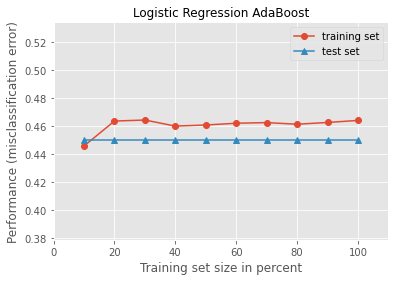

Model: Logistic Regression AdaBoost
Model score: 0.55
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      2199
           1       0.00      0.00      0.00      1801

    accuracy                           0.55      4000
   macro avg       0.27      0.50      0.35      4000
weighted avg       0.30      0.55      0.39      4000

----------------------------------------------------------
AdaBoost Scores List
{'Logistic Regression': 0.55}


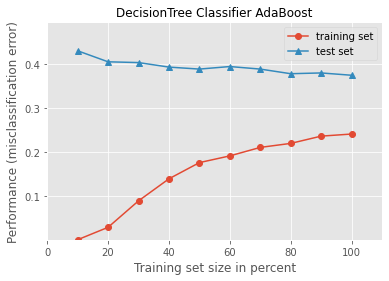

Model: DecisionTree Classifier AdaBoost
Model score: 0.63
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.72      0.68      2199
           1       0.60      0.51      0.55      1801

    accuracy                           0.63      4000
   macro avg       0.62      0.62      0.62      4000
weighted avg       0.62      0.63      0.62      4000

----------------------------------------------------------
AdaBoost Scores List
{'Logistic Regression': 0.55, 'DecisionTree Classifier': 0.626}


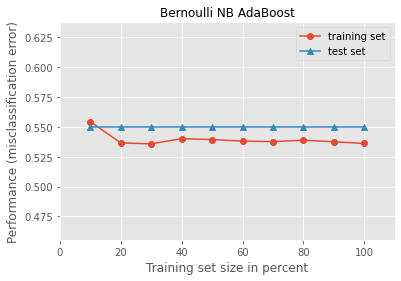

Model: Bernoulli NB AdaBoost
Model score: 0.45
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2199
           1       0.45      1.00      0.62      1801

    accuracy                           0.45      4000
   macro avg       0.23      0.50      0.31      4000
weighted avg       0.20      0.45      0.28      4000

----------------------------------------------------------
AdaBoost Scores List
{'Logistic Regression': 0.55, 'DecisionTree Classifier': 0.626, 'Bernoulli NB': 0.45}


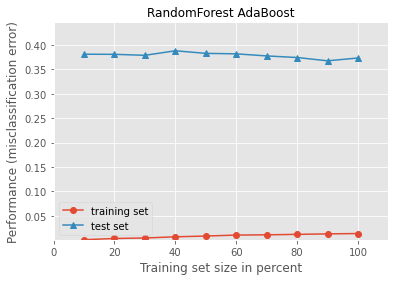

Model: RandomForest AdaBoost
Model score: 0.63
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      2199
           1       0.59      0.57      0.58      1801

    accuracy                           0.63      4000
   macro avg       0.62      0.62      0.62      4000
weighted avg       0.63      0.63      0.63      4000

----------------------------------------------------------
AdaBoost Scores List
{'Logistic Regression': 0.55, 'DecisionTree Classifier': 0.626, 'Bernoulli NB': 0.45, 'RandomForest': 0.627}


In [38]:
for classifier, name in zip(classifiers, model_names):
    Ada_boosting_pipeline(classifier, X_train, X_test, y_train, y_test, name)

In [50]:
adaboost_list_scores = list(adaboost_scores.values())
adaboost_list_scores = [0.55, 'N/A', 'N/A', 0.626, 0.45, 0.627]
baseline_scores_df['AdaBoost Scores'] =  adaboost_list_scores
baseline_scores_df.rename(columns = {'Scores': 'Baseline Scores'}, inplace=  True)
baseline_scores_df

,Baseline Scores,Bagging Scores,AdaBoost Scores
LogisticRegression,0.550,0.55,0.55
KNN,0.597,0.589,N/A
SVC,0.550,0.55,N/A
DecisionTree,0.674,0.672,0.626
Bernoulli NB,0.666,0.668,0.45
random forest classifier,0.633,N/A,0.627


- Using AdaBoost, none of the models seemed to improve.
- In fact, Bernoulli NB model seemed to have high bias and low variance.
- While random forest had low variance and high bias according to the learning curves.
- SVC and KNN were not able to be executed with the AdaBoost Model, and thus were left N/A.

# Using Gradient Boost

In [53]:
gbc = GradientBoostingClassifier(random_state=7)
gbc.fit(X_train, y_train)
evaluate_model(gbc, X_test, y_test, 'Gradient Boosting Classifier')

Model: Gradient Boosting Classifier
Model score: 0.68
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.89      0.75      2199
           1       0.75      0.41      0.54      1801

    accuracy                           0.68      4000
   macro avg       0.70      0.65      0.64      4000
weighted avg       0.70      0.68      0.65      4000

----------------------------------------------------------
Baseline Scores List
{'LogisticRegression': 0.55, 'KNN': 0.597, 'SVC': 0.55, 'DecisionTree': 0.674, 'Bernoulli NB': 0.666, 'random forest classifier': 0.633, 'Gradient Boosting Classifier': 0.676}


In [58]:
# Updating Scores dataframe
baseline_scores_df = baseline_scores_df.append(pd.Series({'Baseline Scores':'N/A', 'Bagging Scores': 'N/A', 'AdaBoost Scores': 'N/A'}, name = 'Gradient Boosting Classifier'))
baseline_scores_df

,Baseline Scores,Bagging Scores,AdaBoost Scores
LogisticRegression,0.55,0.55,0.55
KNN,0.597,0.589,N/A
SVC,0.55,0.55,N/A
DecisionTree,0.674,0.672,0.626
Bernoulli NB,0.666,0.668,0.45
random forest classifier,0.633,N/A,0.627
Gradient Boosting Classifier,N/A,N/A,N/A


In [59]:
baseline_scores_df['Gradient Boost Score'] = ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 0.676]
baseline_scores_df

,Baseline Scores,Bagging Scores,AdaBoost Scores,Gradient Boost Score
LogisticRegression,0.55,0.55,0.55,N/A
KNN,0.597,0.589,N/A,N/A
SVC,0.55,0.55,N/A,N/A
DecisionTree,0.674,0.672,0.626,N/A
Bernoulli NB,0.666,0.668,0.45,N/A
random forest classifier,0.633,N/A,0.627,N/A
Gradient Boosting Classifier,N/A,N/A,N/A,0.676


# Using XGBoost

In [64]:
xg = xgb.XGBClassifier()
params_xg = {'max_depth': np.arange(1, 10)}
xg_gs = GridSearchCV(xg, params_xg, cv = 5)
xg_gs.fit(X_train, y_train)
xg_best = xg_gs.best_estimator_
print(xg_best)

[12:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [67]:
xg_clf = xgb.XGBClassifier(learning_rate = 0.3, n_jobs = 24, tree_method = 'exact', max_depth = 1, seed = 7, objective = 'binary:logistic')
xg_clf.fit(X_train, y_train)
evaluate_model(xg_clf, X_test, y_test, 'XGBoost')

[12:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model: XGBoost
Model score: 0.67
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.88      0.75      2199
           1       0.74      0.41      0.53      1801

    accuracy                           0.67      4000
   macro avg       0.70      0.65      0.64      4000
weighted avg       0.69      0.67      0.65      4000

----------------------------------------------------------
Baseline Scores List
{'LogisticRegression': 0.55, 'KNN': 0.597, 'SVC': 0.55, 'DecisionTree': 0.674, 'Bernoulli NB': 0.666, 'random forest classifier': 0.633, 'Gradient Boosting Classifier'

In [69]:
# Update Scores DF
baseline_scores_df = baseline_scores_df.append(pd.Series({'Baseline Scores':'N/A', 'Bagging Scores': 'N/A', 'AdaBoost Scores': 'N/A', 'Gradient Boost Score': 'N/A'}, name = 'XGBoost Classifier'))
baseline_scores_df

,Baseline Scores,Bagging Scores,AdaBoost Scores,Gradient Boost Score
LogisticRegression,0.55,0.55,0.55,N/A
KNN,0.597,0.589,N/A,N/A
SVC,0.55,0.55,N/A,N/A
DecisionTree,0.674,0.672,0.626,N/A
Bernoulli NB,0.666,0.668,0.45,N/A
random forest classifier,0.633,N/A,0.627,N/A
Gradient Boosting Classifier,N/A,N/A,N/A,0.676
XGBoost Classifier,N/A,N/A,N/A,N/A


In [70]:
baseline_scores_df['XGBoost Score'] = ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 0.672]
baseline_scores_df

,Baseline Scores,Bagging Scores,AdaBoost Scores,Gradient Boost Score,XGBoost Score
LogisticRegression,0.55,0.55,0.55,N/A,N/A
KNN,0.597,0.589,N/A,N/A,N/A
SVC,0.55,0.55,N/A,N/A,N/A
DecisionTree,0.674,0.672,0.626,N/A,N/A
Bernoulli NB,0.666,0.668,0.45,N/A,N/A
random forest classifier,0.633,N/A,0.627,N/A,N/A
Gradient Boosting Classifier,N/A,N/A,N/A,0.676,N/A
XGBoost Classifier,N/A,N/A,N/A,N/A,0.672


# Using a Stacking Classifier

In [76]:
stacking_estimators = [('xgb', xgb.XGBClassifier(learning_rate = 0.3, n_jobs = 24, tree_method = 'exact', max_depth = 1, seed = 7, objective = 'binary:logistic')),
                        ('gb', GradientBoostingClassifier(random_state=7))
                        ]
stacker = StackingClassifier(estimators= stacking_estimators, final_estimator=DecisionTreeClassifier())
stacker.fit(X_train, y_train)
evaluate_model(stacker, X_test, y_test, 'Stacking Classifier')

[13:03:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [77]:
baseline_scores_df = baseline_scores_df.append(pd.Series({'Baseline Scores':'N/A', 'Bagging Scores': 'N/A', 'AdaBoost Scores': 'N/A', 'Gradient Boost Score': 'N/A', 'XGBoost Score': 'N/A'}, name = 'Stacking Classifier'))
baseline_scores_df['Stacking Classifier Score'] = ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 0.609]

baseline_scores_df

,Baseline Scores,Bagging Scores,AdaBoost Scores,Gradient Boost Score,XGBoost Score,Stacking Classifier Score
LogisticRegression,0.55,0.55,0.55,N/A,N/A,N/A
KNN,0.597,0.589,N/A,N/A,N/A,N/A
SVC,0.55,0.55,N/A,N/A,N/A,N/A
DecisionTree,0.674,0.672,0.626,N/A,N/A,N/A
Bernoulli NB,0.666,0.668,0.45,N/A,N/A,N/A
random forest classifier,0.633,N/A,0.627,N/A,N/A,N/A
Gradient Boosting Classifier,N/A,N/A,N/A,0.676,N/A,N/A
XGBoost Classifier,N/A,N/A,N/A,N/A,0.672,N/A
Stacking Classifier,N/A,N/A,N/A,N/A,N/A,0.609


In [84]:
# Create final df
results = {
    'Logistic Regression': 0.55,
    'KNN': 0.60,
    'SVC': 0.55,
    'Decision Tree': 0.674,
    'BernoulliNB': 0.666,
    'Random Forest': 0.63,
    'Bagging: Logistic Regression': 0.55,
    'Bagging: KNN': 0.59,
    'Bagging: SVC': 0.55,
    'Bagging: Decision Tree': 0.672,
    'Bagging: Bernoulli NB': 0.668,
    'Ada Boost: Logistic Regression': 0.55,
    'Ada Boost: Decision Tree': 0.626,
    'Ada Boost: Bernoulli NB': 0.45,
    'Ada Boost: Random Forest': 0.627,
    'Gradient Boost Classifier': 0.676,
    'XGBoost': 0.67,
    'Stacking': 0.609
    }
results = pd.DataFrame.from_dict(results, orient='index', columns = ['Scores'])
results

,Scores
Logistic Regression,0.550
KNN,0.600
SVC,0.550
Decision Tree,0.674
BernoulliNB,0.666
Random Forest,0.630
Bagging: Logistic Regression,0.550
Bagging: KNN,0.590
Bagging: SVC,0.550
Bagging: Decision Tree,0.672


In [85]:
results.sort_values(by = 'Scores', ascending= False, inplace = True)
results

,Scores
Gradient Boost Classifier,0.676
Decision Tree,0.674
Bagging: Decision Tree,0.672
XGBoost,0.670
Bagging: Bernoulli NB,0.668
BernoulliNB,0.666
Random Forest,0.630
Ada Boost: Random Forest,0.627
Ada Boost: Decision Tree,0.626
Stacking,0.609


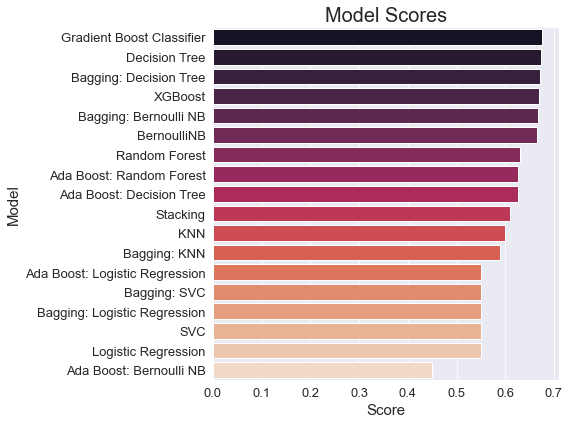

In [88]:
# Visualize data
plt.figure(figsize=(8, 6))
ax = sns.set_style('darkgrid')
ax = sns.barplot(y=results.index, x = results['Scores'], palette = 'rocket')
ax.set_ylabel('Model', fontsize = 15)
ax.set_xlabel('Score', fontsize = 15)
ax.axes.set_title('Model Scores (without PCA)', fontsize = 20)
plt.xticks()
plt.tick_params(labelsize = 13)
plt.tight_layout()

# Conclusions

- Overall, the Decision Tree Classifier had the best baseline model improvement on our target accuracy for our model.
- Ensemble techniques such as random forest, bagging and boosting techniques did little to improve on them.
- Using Gradient Boost provided us with our best ensemble and overall model.
- We can potentially increase the accuracy of our model via PCA and dimensionality reduction.
- However, aiming for a target accuracy of over 80% is very optimistic and might be out of reach, due to the nature of our data and the problem we are trying to solve. Predicting human behaviour and risk of certain actions is highly subjective and circumstantial. As a result, any significant increase in our models ability to predict, above the capability of baseline results of 45% can be considered a success. 